In [17]:
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import InceptionV3
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam


In [18]:
df = pd.read_csv('list_attribute.txt', delim_whitespace=True, index_col=0)
image_files = os.listdir('images/')
filtered_df = df[df.index.isin(image_files)]
filtered_df

/tmp/ipykernel_20912/2986566526.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('list_attribute.txt', delim_whitespace=True, index_col=0)


,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000051.jpg,1,-1,-1,1,1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
000052.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
000065.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
000166.jpg,1,-1,-1,-1,-1,-1,-1,1,-1,-1,...,1,-1,-1,-1,-1,1,-1,-1,-1,-1
000198.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202320.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,1,-1,-1,1,-1,-1,1
202340.jpg,-1,-1,1,-1,-1,-1,-1,-1,1,-1,...,-1,1,1,-1,-1,-1,1,-1,-1,1
202347.jpg,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1
202357.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,-1,1


In [19]:
filtered_df.columns

Index(['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object')

In [20]:
filtered_df.reset_index(inplace=True)

In [21]:
compiled_df = filtered_df[['index', 'Male']]
compiled_df

,index,Male
0,000051.jpg,1
1,000052.jpg,1
2,000065.jpg,1
3,000166.jpg,1
4,000198.jpg,-1
...,...,...
4995,202320.jpg,-1
4996,202340.jpg,-1
4997,202347.jpg,-1
4998,202357.jpg,-1


In [22]:
compiled_df[compiled_df['Male'] == -1] = 0

/tmp/ipykernel_20912/1056516889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compiled_df[compiled_df['Male'] == -1] = 0


In [23]:
train_files = os.listdir('train/')
validator_files = os.listdir('test/')
train_df = compiled_df[compiled_df['index'].isin(train_files)]
validator_df = compiled_df[compiled_df['index'].isin(validator_files)]

train_df.head()

,index,Male
0,000051.jpg,1
1,000052.jpg,1
2,000065.jpg,1
7,000282.jpg,1
9,000409.jpg,1


In [24]:
validator_df.head()

,index,Male
3,000166.jpg,1
8,000352.jpg,1
10,000414.jpg,1
18,000608.jpg,1
22,000798.jpg,1


In [25]:
train_df.loc[:, ('Male')] = train_df['Male'].astype('string')
validator_df.loc[:, ('Male')] = validator_df['Male'].astype('string')

train_df.head(), validator_df.head()

/tmp/ipykernel_20912/1230635900.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<StringArray>
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
 ...
 '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']
Length: 1425, dtype: string' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_df.loc[:, ('Male')] = train_df['Male'].astype('string')
/tmp/ipykernel_20912/1230635900.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<StringArray>
['1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
 ...
 '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']
Length: 622, dtype: string' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  validator_df.loc[:, ('Male')] = validator_df['Male'].astype('string')


(        index Male
 0  000051.jpg    1
 1  000052.jpg    1
 2  000065.jpg    1
 7  000282.jpg    1
 9  000409.jpg    1,
          index Male
 3   000166.jpg    1
 8   000352.jpg    1
 10  000414.jpg    1
 18  000608.jpg    1
 22  000798.jpg    1)

In [26]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, zoom_range=0.2, rotation_range=0.2)

train_generator_df = datagen.flow_from_dataframe(
 dataframe=train_df,
 directory='train/',
 x_col='index',
 y_col='Male',
 subset='training',
 batch_size=32,
 seed=999,
 shuffle=True,
 class_mode='categorical',
 target_size=(128, 128)
)

validator_generator_df = datagen.flow_from_dataframe(
 dataframe=validator_df,
 directory='test/',
 x_col='index',
 y_col='Male',
 subset='validation',
 batch_size=32,
 seed=999,
 shuffle=True,
 class_mode='categorical',
 target_size=(128, 128)
)

Found 1140 validated image filenames belonging to 1 classes.
Found 124 validated image filenames belonging to 1 classes.


In [27]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

In [28]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(128, activation='softmax')
])

# optimizer = Adam(learning_rate=0.999)  # Adjust learning rate as needed

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(
 train_generator_df,
 epochs=30,
 validation_data=validator_generator_df
)

Epoch 1/30
36/36 [==============================] - 31s 140ms/step - loss: 0.1153 - accuracy: 0.0000e+00 - val_loss: 1.5756e-04 - val_accuracy: 0.0000e+00
Epoch 2/30
36/36 [==============================] - 3s 92ms/step - loss: 1.4135e-05 - accuracy: 0.0000e+00 - val_loss: 3.0509e-05 - val_accuracy: 0.0000e+00
Epoch 3/30
36/36 [==============================] - 3s 93ms/step - loss: 7.9160e-06 - accuracy: 0.0000e+00 - val_loss: 1.0978e-05 - val_accuracy: 0.0000e+00
Epoch 4/30
36/36 [==============================] - 3s 94ms/step - loss: 7.2564e-06 - accuracy: 0.0000e+00 - val_loss: 7.2534e-06 - val_accuracy: 0.0000e+00
Epoch 5/30
36/36 [==============================] - 3s 91ms/step - loss: 6.6921e-06 - accuracy: 0.0000e+00 - val_loss: 6.8117e-06 - val_accuracy: 0.0000e+00
Epoch 6/30
36/36 [==============================] - 3s 92ms/step - loss: 6.1546e-06 - accuracy: 0.0000e+00 - val_loss: 6.2335e-06 - val_accuracy: 0.0000e+00
Epoch 7/30
36/36 [==============================] - 3s 90ms/

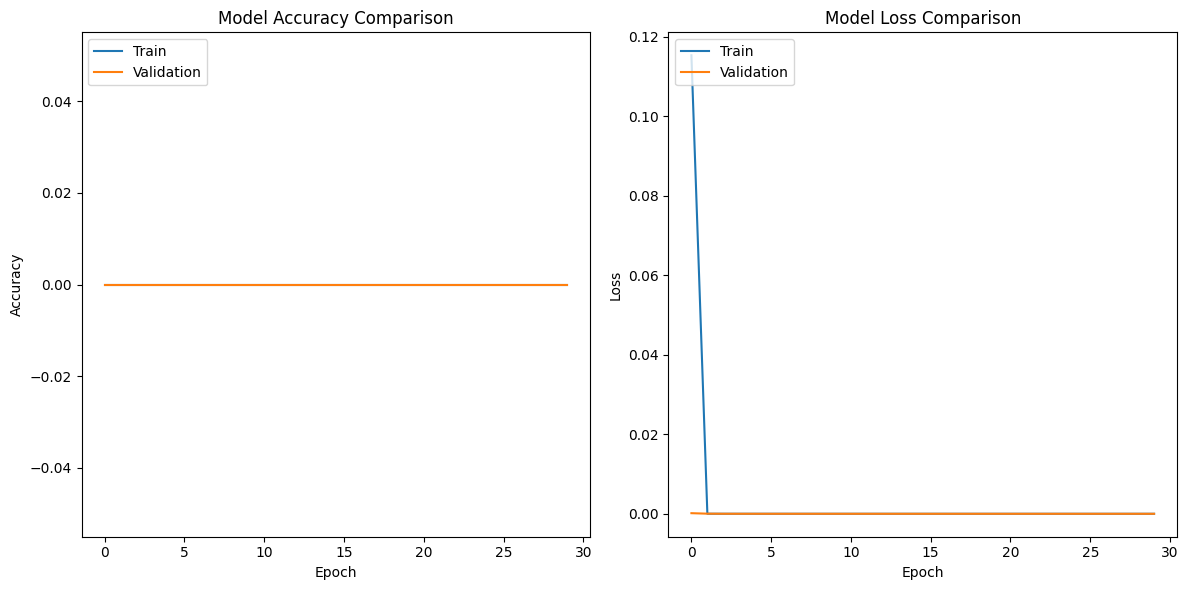

In [29]:
plt.figure(figsize=(12, 6))
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
# Show plots
plt.tight_layout()
plt.show()

In [30]:
# Evaluate the model on the validation set
evaluation = model.evaluate(validator_generator_df)
# Print the evaluation results
print(f"Validation Loss: {evaluation[0]}")
print(f"Validation Accuracy: {evaluation[1]}")

4/4 [==============================] - 0s 70ms/step - loss: 1.6342e-06 - accuracy: 0.0000e+00
Validation Loss: 1.634248860682419e-06
Validation Accuracy: 0.0


In [31]:
model.save("model_saved/inception-v3-experiment-03.h5")

/home/insomnius/.pyenv/versions/3.11.6/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
